In [2]:
import os
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
%matplotlib inline

In [2]:
mask_len = 12
seq_len = 288
folder_path = '/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/complementation_result/'

In [3]:
def cal_mae(word_len=1, comple_len=12):
    file = folder_path + f'Complement_Result{word_len}_{comple_len}.csv'
    df = pd.read_csv(file)
    num_seq = len(df['Input288']) / seq_len
    input_list = []
    complement_list = []

    for num in range(int(num_seq)):
        start = int(num * seq_len)
        end = int(num * seq_len + seq_len)
        input288 = [input for input in df['Input288'].iloc[start:end].tolist()]
        input_list.append(input288)

        position288 = [pos for pos in df['Position'].iloc[start:end].tolist()]
        comple288 = []
        for ind, pos in enumerate(position288):
            comple = df['Complementation'].iloc[start+ind] if pos==1.0 else input288[ind]
            comple288.append(comple)
        complement_list.append(comple288)
        
    mae_list = []
    for i in range(len(input_list)):
        mae = mean_absolute_error(input_list[i], complement_list[i])
        mae_list.append(mae)
    return mae_list

In [4]:
word_len = 1
comple_len = 12
file = folder_path + f'Complement_Result{word_len}_{comple_len}.csv'
df = pd.read_csv(file)

mae1 = np.array(cal_mae(word_len=1, comple_len=12))
# print(len(mae1)) # 22720
min_index, min = mae1.argmin(), mae1.min()
print(min_index, min)

day_num = min_index
position = df['Position'].iloc[day_num*seq_len:(day_num+1)*seq_len]
input = df['Input288'].iloc[day_num*seq_len:(day_num+1)*seq_len]
complement = df['Complementation'].iloc[day_num*seq_len:(day_num+1)*seq_len]
for index, pos in enumerate(position):
    complement[index] = complement[index] if pos==1.0 else 0.0

plt.plot(input, label='Truth')
plt.plot(complement, label='Complementation')
plt.text(20, 200, f'Day_{day_num}')
plt.legend()

9192 0.01608356597222223


KeyError: 76

In [108]:
mae2 = np.array(cal_mae(word_len=2))
print(len(mae2)) # 22720
min_index, min = mae2.argmin(), mae2.min()
print(min_index, min)

22720
14415 0.028629923611111077


In [109]:
mae6 = np.array(cal_mae(word_len=6))
print(len(mae6)) # 22720
min_index, min = mae6.argmin(), mae6.min()
print(min_index, min)

22720
9930 0.015382132291666665


In [111]:
mae12 = np.array(cal_mae(word_len=12))
print(len(mae12)) # 22720
min_index, min = mae12.argmin(), mae12.min()
print(min_index, min)

22720
12182 0.01623233333333333


In [112]:
mae24 = np.array(cal_mae(word_len=24))
print(len(mae24)) # 22720
min_index, min = mae24.argmin(), mae24.min()
print(min_index, min)

22720
12426 0.00901110798611112


In [77]:
file = folder_path + f'Complement_Result{word_len}_{comple_len}.csv'
df = pd.read_csv(file)
df

,Unnamed: 0,Complementation,Input288,Input48,Position
0,0,80.014560,80.723785,0.0,0.0
1,1,77.927780,79.936485,0.0,0.0
2,2,77.242230,77.447070,0.0,0.0
3,3,75.638084,73.705890,0.0,0.0
4,4,74.253370,68.421580,0.0,0.0
...,...,...,...,...,...
6543355,6543355,62.336000,46.619910,0.0,0.0
6543356,6543356,61.351673,45.349926,0.0,0.0
6543357,6543357,59.794216,43.624940,0.0,0.0
6543358,6543358,59.411045,42.854115,0.0,0.0


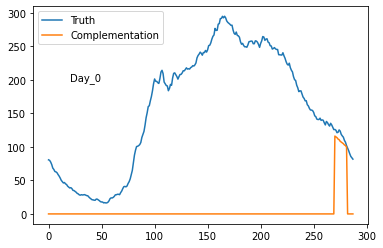

In [67]:
day_num = 0

position = df['Position'].iloc[day_num*seq_len:(day_num+1)*seq_len]
input = df['Input288'].iloc[day_num*seq_len:(day_num+1)*seq_len]
complement = df['Complementation'].iloc[day_num*seq_len:(day_num+1)*seq_len]

for index, pos in enumerate(position):
    complement[index] = complement[index] if pos==1.0 else 0.0

plt.plot(input, label='Truth')
plt.plot(complement, label='Complementation')
plt.text(20, 200, f'Day_{day_num}')
plt.legend()

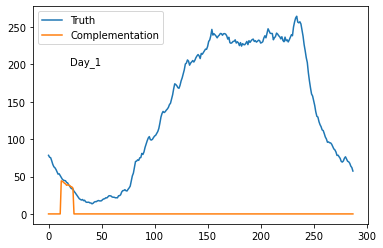

In [68]:
day_num = 1

position = df['Position'].iloc[288:288*2].tolist()
input = df['Input288'].iloc[288:288*2].tolist()
complement = df['Complementation'].iloc[288:288*2].tolist()

for index, pos in enumerate(position):
    complement[index] = complement[index] if pos==1.0 else 0.0

plt.plot(input, label='Truth')
plt.plot(complement, label='Complementation')
plt.text(20, 200, f'Day_{day_num}')
plt.legend()

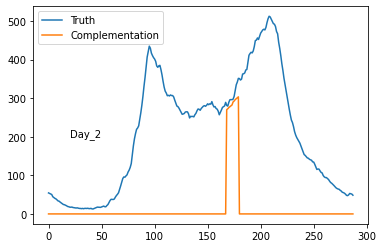

In [69]:
day_num = 2

position = df['Position'].iloc[day_num*seq_len:(day_num+1)*seq_len].tolist()
input = df['Input288'].iloc[day_num*seq_len:(day_num+1)*seq_len].tolist()
complement = df['Complementation'].iloc[day_num*seq_len:(day_num+1)*seq_len].tolist()

for index, pos in enumerate(position):
    complement[index] = complement[index] if pos==1.0 else 0.0

plt.plot(input, label='Truth')
plt.plot(complement, label='Complementation')
plt.text(20, 200, f'Day_{day_num}')
plt.legend()

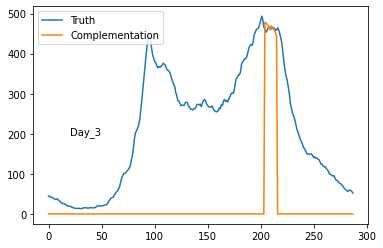

In [70]:
day_num = 3

position = df['Position'].iloc[day_num*seq_len:(day_num+1)*seq_len].tolist()
input = df['Input288'].iloc[day_num*seq_len:(day_num+1)*seq_len].tolist()
complement = df['Complementation'].iloc[day_num*seq_len:(day_num+1)*seq_len].tolist()

for index, pos in enumerate(position):
    complement[index] = complement[index] if pos==1.0 else 0.0

plt.plot(input, label='Truth')
plt.plot(complement, label='Complementation')
plt.text(20, 200, f'Day_{day_num}')
plt.legend()

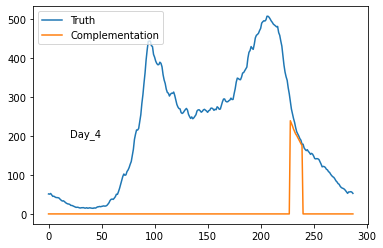

In [71]:
day_num = 4

position = df['Position'].iloc[day_num*seq_len:(day_num+1)*seq_len].tolist()
input = df['Input288'].iloc[day_num*seq_len:(day_num+1)*seq_len].tolist()
complement = df['Complementation'].iloc[day_num*seq_len:(day_num+1)*seq_len].tolist()

for index, pos in enumerate(position):
    complement[index] = complement[index] if pos==1.0 else 0.0

plt.plot(input, label='Truth')
plt.plot(complement, label='Complementation')
plt.text(20, 200, f'Day_{day_num}')
plt.legend()

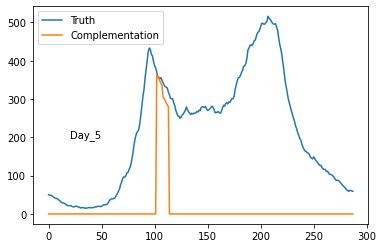

In [72]:
day_num = 5

position = df['Position'].iloc[day_num*seq_len:(day_num+1)*seq_len].tolist()
input = df['Input288'].iloc[day_num*seq_len:(day_num+1)*seq_len].tolist()
complement = df['Complementation'].iloc[day_num*seq_len:(day_num+1)*seq_len].tolist()

for index, pos in enumerate(position):
    complement[index] = complement[index] if pos==1.0 else 0.0

plt.plot(input, label='Truth')
plt.plot(complement, label='Complementation')
plt.text(20, 200, f'Day_{day_num}')
plt.legend()

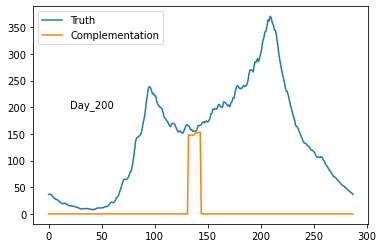

In [75]:
day_num = 200

position = df['Position'].iloc[day_num*seq_len:(day_num+1)*seq_len].tolist()
input = df['Input288'].iloc[day_num*seq_len:(day_num+1)*seq_len].tolist()
complement = df['Complementation'].iloc[day_num*seq_len:(day_num+1)*seq_len].tolist()

for index, pos in enumerate(position):
    complement[index] = complement[index] if pos==1.0 else 0.0

plt.plot(input, label='Truth')
plt.plot(complement, label='Complementation')
plt.text(20, 200, f'Day_{day_num}')
plt.legend()

In [74]:
6543360/288

22720.0

#### plot


In [3]:
folder_path = '/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/complementation_result/'
file = folder_path + f'Complement_Result1_36.csv'
df = pd.read_csv(file)
df

,Unnamed: 0,Complementation,Input288,Input48,Position
0,0,189.80116,80.723785,0.0,0.0
1,1,189.66698,79.936485,0.0,0.0
2,2,187.80453,77.447070,0.0,0.0
3,3,184.63042,73.705890,0.0,0.0
4,4,183.86844,68.421580,0.0,0.0
...,...,...,...,...,...
6543355,6543355,218.76384,46.619910,0.0,0.0
6543356,6543356,218.98600,45.349926,0.0,0.0
6543357,6543357,218.84352,43.624940,0.0,0.0
6543358,6543358,218.69188,42.854115,0.0,0.0


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


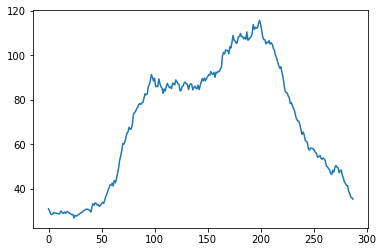

In [14]:
seq_len = 288
day_num = 3566
ts = np.array(df['Input288'].iloc[day_num*seq_len:day_num*seq_len+seq_len])
pos = np.array(df['Position'].iloc[day_num*seq_len:day_num*seq_len+seq_len])
plt.plot(ts)
print(pos)

In [15]:
index1 = 52
index2 = 120
# ts.to_csv('/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/data/com_test.csv')
np.savetxt('/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/data/com_test.csv', ts.reshape(1,288), delimiter=',')